In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
import numpy as np

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def MSE(x, y, theta):
    m = y.shape[0]
    cost =(1/(2 * m)) * np.sum((theta * x -y)** 2)
    return cost 

In [23]:
def MSE_derivative(x, y, theta):
    m = y.shape[0]
    cost_derivative =(1/m) * np.sum((theta * x -y)* x)
    return cost_derivative 

In [6]:
data = pd.read_csv("winequality-red.csv", sep=";")


In [8]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
data.iloc[:5,:5] #Alternate way to see first 5 lines and 5 columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides
0,7.4,0.70,0.00,1.9,0.076
1,7.8,0.88,0.00,2.6,0.098
2,7.8,0.76,0.04,2.3,0.092
3,11.2,0.28,0.56,1.9,0.075
4,7.4,0.70,0.00,1.9,0.076


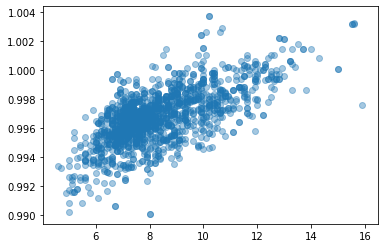

In [10]:
plt.scatter(data['fixed acidity'], data['density'], alpha=0.4)

In [11]:
X = data['fixed acidity'].to_numpy().reshape(-1,1)
X.shape

(1599, 1)

In [16]:
y = data['density'].to_numpy().reshape(-1,1)
y.shape

(1599, 1)

In [24]:
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
y = standard_scaler.fit_transform(y)


In [26]:
MSE_derivative(x=X, y=y, theta=0)

-0.6680472921189736

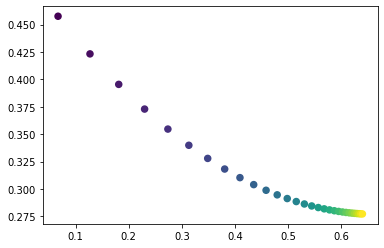

In [27]:
lr = 0.1
theta = 0

theta_all = []
cost_all = []

for i in range(30):
    theta = theta - lr * MSE_derivative(x=X, y=y, theta = theta)
    cost = MSE(X,y,theta)
    
    theta_all.append(theta)
    cost_all.append(cost)
    
plt.scatter(theta_all, cost_all, linewidth=1.5, c=np.arange(len(cost_all)))

In [28]:
best_slope = theta_all[-1]

In [29]:
best_slope

0.6397279936234286

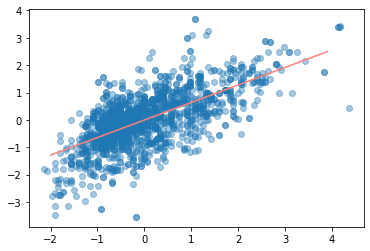

In [31]:
x_axis = np.arange(-2, 4, 0.1)
y_axis = best_slope * x_axis
plt.scatter(X,y,alpha=0.4, zorder=0)
plt.plot (x_axis, y_axis, c='#FF8177')